In [ ]:
!pip install mediapipe

     |████████████████████████████████| 36.1MB 65.1MB/s 


In [ ]:
import pandas as pd
import numpy as np
import PIL
from PIL import Image
import cv2
import os

from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

import dlib
from skimage import io
import matplotlib.pyplot as plt
from numpy import asarray


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
imgPath=[]
resize= 1
frame_count_real = []
frame_count_fake = []


# Function to extract frames
def FrameCapture(path,globalCount,type_dataset,label):
    frame_count=[]
    imgPath = []
    temp = 0
    v_cap = cv2.VideoCapture(path)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Pick 'n_frames' evenly spaced frames to sample
    sample = np.linspace(0, v_len - 1, n_frames).astype(int) #Index in sample array are the frames which will be extracted.

    # Loop through frames
    
    frames = []
    for j in range(v_len):
        success = v_cap.grab()
        if j in sample:
            # Load frame
            success, frame = v_cap.read()
            if not success:
                
                continue
            
            frame = Image.fromarray(frame)
            
            # Resize frame to desired size
            if resize is not None:
                frame = frame.resize([int(d * resize) for d in frame.size])
                frame = np.asarray(frame)
            frames.append(frame)
    
    # Used as counter variable
  
    # checks whether frames were extracted
    count = globalCount
    currentCount = 0
    success = 1
  
    while success and currentCount<min(n_frames,len(frames)):
  
        
        cv2.imwrite("All_Images/" + str(type_dataset) + "_"+ str(label) + "_frame%d.jpg" % (count//n_frames),frames[int(currentCount)])

        imgPath.append("All_Images/" + str(type_dataset) + "_"+ str(label) + "_frame%d.jpg"%(count//n_frames))
  
        count += n_frames
        currentCount += 1
      
    if(type_dataset=="Test"):
      frame_count.append(currentCount)

    return imgPath,count,frame_count



In [ ]:
import os


n_frames = 32
resize= 1

def captureFrame(type_dataset,label):
  imgPath = []
  frame_count = []
  count = 0
  video_label=[]
  for file in os.listdir("/content/drive/MyDrive/Deepfake_Mix/"+str(type_dataset)+"/"+str(label)):
      path=os.path.join("/content/drive/MyDrive/Deepfake_Mix/"+str(type_dataset)+"/"+str(label), file)
      temp , count ,x= FrameCapture(path,count,type_dataset,label)
      imgPath = imgPath +  temp
      if (type_dataset == 'Test'):
        frame_count.append(x[0])
        if label=='Fake':
          video_label.append(0)
        else:
          video_label.append(1)
  return imgPath,frame_count,video_label

In [ ]:
imgPath_train_fake,  frame_count_train_fake, _= captureFrame("Train","Fake")
imgPath_train_real,  frame_count_train_real, _= captureFrame("Train","Real")
imgPath_val_fake,  frame_count_val_fake, video_label_val_fake= captureFrame("Val","Fake")
imgPath_val_real,  frame_count_val_real, video_label_val_real= captureFrame("Val","Real")
imgPath_test_fake,  frame_count_test_fake, video_label_test_fake= captureFrame("Test","Fake")
imgPath_test_real,  frame_count_test_real, video_label_test_real= captureFrame("Test","Real")

In [ ]:
print(len(imgPath_train_fake))
print(len(imgPath_train_real))
print(imgPath_val_fake)
print(imgPath_val_real)
print(len(imgPath_test_fake))
print(len(imgPath_test_real))

1348
1456
['All_Images/Val_Fake_frame0.jpg', 'All_Images/Val_Fake_frame1.jpg', 'All_Images/Val_Fake_frame2.jpg', 'All_Images/Val_Fake_frame3.jpg', 'All_Images/Val_Fake_frame4.jpg', 'All_Images/Val_Fake_frame5.jpg', 'All_Images/Val_Fake_frame6.jpg', 'All_Images/Val_Fake_frame7.jpg', 'All_Images/Val_Fake_frame8.jpg', 'All_Images/Val_Fake_frame9.jpg', 'All_Images/Val_Fake_frame10.jpg', 'All_Images/Val_Fake_frame11.jpg', 'All_Images/Val_Fake_frame12.jpg', 'All_Images/Val_Fake_frame13.jpg', 'All_Images/Val_Fake_frame14.jpg', 'All_Images/Val_Fake_frame15.jpg', 'All_Images/Val_Fake_frame16.jpg', 'All_Images/Val_Fake_frame17.jpg', 'All_Images/Val_Fake_frame18.jpg', 'All_Images/Val_Fake_frame19.jpg', 'All_Images/Val_Fake_frame20.jpg', 'All_Images/Val_Fake_frame21.jpg', 'All_Images/Val_Fake_frame22.jpg', 'All_Images/Val_Fake_frame23.jpg', 'All_Images/Val_Fake_frame24.jpg', 'All_Images/Val_Fake_frame25.jpg', 'All_Images/Val_Fake_frame26.jpg', 'All_Images/Val_Fake_frame27.jpg', 'All_Images/Val_Fak

#DLIB

In [ ]:



def detect_faces(image):

    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames

def faceDetect_DLIB(type_dataset,label,imgPath):
  processedImagePath_dlib = []
  count = 0
  for i in range(len(imgPath)):
      # Load image
      img_path = imgPath[i]
      image = io.imread(img_path)

      # Detect faces
      detected_faces = detect_faces(image)

      # Crop faces and plot
      for n, face_rect in enumerate(detected_faces):
          face = Image.fromarray(image).crop(face_rect)
          final_face = asarray(face)
          resize_face = cv2.resize(final_face,(64, 64), interpolation=cv2.INTER_CUBIC)
          finalImg = cv2.cvtColor(resize_face, cv2.COLOR_BGR2RGB)
          cv2.imwrite("DLIB" + "_" + str(type_dataset) + "_" + str(label) + "/dlib%d.jpg" % count,finalImg)
          
          processedImagePath_dlib.append("DLIB" + "_" + str(type_dataset) + "_" + str(label) + "/dlib%d.jpg" %count)
          

          count += 1
  return processedImagePath_dlib


In [ ]:
processedImagePath_Train_Fake_dlib = faceDetect_DLIB("Train","Fake",imgPath_train_fake)

In [ ]:
print(processedImagePath_Train_Fake_dlib)

['DLIB_Train_Fake/dlib0.jpg', 'DLIB_Train_Fake/dlib1.jpg', 'DLIB_Train_Fake/dlib2.jpg', 'DLIB_Train_Fake/dlib3.jpg', 'DLIB_Train_Fake/dlib4.jpg', 'DLIB_Train_Fake/dlib5.jpg', 'DLIB_Train_Fake/dlib6.jpg', 'DLIB_Train_Fake/dlib7.jpg', 'DLIB_Train_Fake/dlib8.jpg', 'DLIB_Train_Fake/dlib9.jpg', 'DLIB_Train_Fake/dlib10.jpg', 'DLIB_Train_Fake/dlib11.jpg', 'DLIB_Train_Fake/dlib12.jpg', 'DLIB_Train_Fake/dlib13.jpg', 'DLIB_Train_Fake/dlib14.jpg', 'DLIB_Train_Fake/dlib15.jpg', 'DLIB_Train_Fake/dlib16.jpg', 'DLIB_Train_Fake/dlib17.jpg', 'DLIB_Train_Fake/dlib18.jpg', 'DLIB_Train_Fake/dlib19.jpg', 'DLIB_Train_Fake/dlib20.jpg', 'DLIB_Train_Fake/dlib21.jpg', 'DLIB_Train_Fake/dlib22.jpg', 'DLIB_Train_Fake/dlib23.jpg', 'DLIB_Train_Fake/dlib24.jpg', 'DLIB_Train_Fake/dlib25.jpg', 'DLIB_Train_Fake/dlib26.jpg', 'DLIB_Train_Fake/dlib27.jpg', 'DLIB_Train_Fake/dlib28.jpg', 'DLIB_Train_Fake/dlib29.jpg', 'DLIB_Train_Fake/dlib30.jpg', 'DLIB_Train_Fake/dlib31.jpg', 'DLIB_Train_Fake/dlib32.jpg', 'DLIB_Train_Fake/dl

In [ ]:
processedImagePath_Train_Real_dlib = faceDetect_DLIB("Train","Real",imgPath_train_real)

In [ ]:
print(processedImagePath_Train_Real_dlib)

['DLIB_Train_Real/dlib0.jpg', 'DLIB_Train_Real/dlib1.jpg', 'DLIB_Train_Real/dlib2.jpg', 'DLIB_Train_Real/dlib3.jpg', 'DLIB_Train_Real/dlib4.jpg', 'DLIB_Train_Real/dlib5.jpg', 'DLIB_Train_Real/dlib6.jpg', 'DLIB_Train_Real/dlib7.jpg', 'DLIB_Train_Real/dlib8.jpg', 'DLIB_Train_Real/dlib9.jpg', 'DLIB_Train_Real/dlib10.jpg', 'DLIB_Train_Real/dlib11.jpg', 'DLIB_Train_Real/dlib12.jpg', 'DLIB_Train_Real/dlib13.jpg', 'DLIB_Train_Real/dlib14.jpg', 'DLIB_Train_Real/dlib15.jpg', 'DLIB_Train_Real/dlib16.jpg', 'DLIB_Train_Real/dlib17.jpg', 'DLIB_Train_Real/dlib18.jpg', 'DLIB_Train_Real/dlib19.jpg', 'DLIB_Train_Real/dlib20.jpg', 'DLIB_Train_Real/dlib21.jpg', 'DLIB_Train_Real/dlib22.jpg', 'DLIB_Train_Real/dlib23.jpg', 'DLIB_Train_Real/dlib24.jpg', 'DLIB_Train_Real/dlib25.jpg', 'DLIB_Train_Real/dlib26.jpg', 'DLIB_Train_Real/dlib27.jpg', 'DLIB_Train_Real/dlib28.jpg', 'DLIB_Train_Real/dlib29.jpg', 'DLIB_Train_Real/dlib30.jpg', 'DLIB_Train_Real/dlib31.jpg', 'DLIB_Train_Real/dlib32.jpg', 'DLIB_Train_Real/dl

In [ ]:
processedImagePath_Val_Fake_dlib = faceDetect_DLIB("Val","Fake",imgPath_test_fake)

In [ ]:
processedImagePath_Val_Real_dlib = faceDetect_DLIB("Val","Real",imgPath_val_real)

In [ ]:
processedImagePath_Test_Fake_dlib = faceDetect_DLIB("Test","Fake",imgPath_test_fake)

In [ ]:
processedImagePath_Test_Real_dlib = faceDetect_DLIB("Test","Real",imgPath_test_real)

# Data Augmentation

In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from skimage.util import random_noise
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import argparse

In [ ]:
import numpy as np
import os
import cv2

def noisy(noise_typ,image):
  if noise_typ == "gauss":
    mean = 0
    var = 100
    sigma = var ** 0.5
    row, col, _ = image.shape
    gaussian = np.random.normal(mean, sigma, (row, col)) 

    noisy = np.zeros(image.shape, np.float32)

    if len(image.shape) == 2:
        noisy = image + gaussian
    else:
        noisy[:, :, 0] = image[:, :, 0] + gaussian
        noisy[:, :, 1] = image[:, :, 1] + gaussian
        noisy[:, :, 2] = image[:, :, 2] + gaussian

    cv2.normalize(noisy, noisy, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    noisy = noisy.astype(np.uint8)
    return noisy
  elif noise_typ == "s&p":
    row,col,ch = image.shape
    s_vs_p = 0.5
    amount = 0.05
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out

  
  
  elif noise_typ =="speckle":
    row,col,ch = image.shape
    gauss = np.random.randn(row,col,ch)
    gauss = gauss.reshape(row,col,ch)
    noisy = image + image * gauss
    return noisy



In [ ]:
img = cv2.imread(processedImagePath_mediapipe[0])
noisy_img = noisy("gauss", img)
cv2_imshow(noisy_img)

In [ ]:
def create_noisy_img(face_detector,face_detector_arr,type_dataset,label):
    arr=[]
    for i in range(len(face_detector_arr)):
        img=cv2.imread(face_detector_arr[i])
        
        noisy_img = noisy("gauss", img)
        noisy_img = cv2.resize(noisy_img, (64, 64))
        
        cv2.imwrite("/content/DLIB_"+type_dataset+"_"+label+"_Noise/dlib_noise%d.jpg" % i,noisy_img)
        arr.append("/content/DLIB_"+type_dataset+"_"+label+"_Noise/dlib_noise%d.jpg"%i)
    return arr



In [ ]:
processedImagePath_MTCNN_noise=create_noisy_img("MTCNN",processedImagePath_MTCNN)

In [ ]:
processedImagePath_Train_Real_dlib_noise=create_noisy_img("DLIB",processedImagePath_Train_Real_dlib,"Train","Real")

In [ ]:
processedImagePath_Train_Fake_dlib_noise=create_noisy_img("DLIB",processedImagePath_Train_Fake_dlib,"Train","Fake")

#Training

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from skimage.color import rgb2grey
from skimage.feature import hog

def create_features(img):

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    features=[]
    for i in gray:
      for j in i:
        features.append(j)
    
    return features


In [ ]:
def createFeatureDatabase(real_list, fake_list):
  train=[]
  label = []

  

  for i in range(len(fake_list)):
    
    img = cv2.imread(fake_list[i])
    tmp_features = create_features(img)
    train.append(tmp_features)
    label.append(0)

  for i in range(len(real_list)):
    
    img = cv2.imread(real_list[i])
    tmp_features = create_features(img)
    train.append(tmp_features)
    label.append(1)

  
  return train,label

#DLIB

In [ ]:


train_data,label_data = createFeatureDatabase(processedImagePath_Train_Real_dlib,processedImagePath_Train_Fake_dlib)


In [ ]:
train_data_noise,label_data_noise = createFeatureDatabase(processedImagePath_Train_Real_dlib_noise,processedImagePath_Train_Fake_dlib_noise)

In [ ]:

len(train_data)

2816

In [ ]:
test_data, test_label = createFeatureDatabase(processedImagePath_Test_Real_dlib,processedImagePath_Test_Fake_dlib)

##Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

scaler.fit(train_data)  
train_data_ss = scaler.transform(train_data)  

test_data_ss = scaler.transform(test_data)

##LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_train_data = lda.fit_transform(train_data_ss, label_data)


In [ ]:
lda_test_data=lda.transform(test_data_ss)

In [ ]:
lda.explained_variance_ratio_

array([1.])

In [ ]:
lda_train_data

array([[-2.79605545],
       [-5.14096826],
       [-2.45258223],
       ...,
       [ 2.546712  ],
       [ 2.20970008],
       [ 3.35836081]])

In [ ]:
len(lda_train_data[0])

1

##PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
pca_train_data=pca.fit_transform(train_data_ss)

In [ ]:
pca_test_data=pca.transform(test_data_ss)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca_train_data

array([[-4.55245714e+01, -4.44443507e+01, -1.72042785e+01, ...,
        -4.01733655e-03,  7.86725292e-02, -3.87189898e-01],
       [-4.52969342e+01, -4.43977308e+01, -1.73951387e+01, ...,
        -4.54895997e-02, -1.12534848e-01, -3.97847853e-01],
       [-4.53625292e+01, -4.44486810e+01, -1.74321576e+01, ...,
        -2.57956977e-03, -5.95287575e-02, -3.66251720e-01],
       ...,
       [ 3.60973854e+01, -2.93092440e+01, -3.04211577e+01, ...,
        -2.33502764e-01,  3.24943973e-01,  7.25584123e-01],
       [ 2.62557879e+01, -3.96765839e+01, -2.82869807e+01, ...,
        -1.60304884e-01, -4.83875158e-01, -8.78218922e-01],
       [-2.01799974e+00, -5.88501948e+01, -1.72589930e+01, ...,
         3.78234923e-01, -1.89632748e-01,  2.41575537e-01]])

In [ ]:
len(pca_train_data[0])

577

#DeepFake Result

In [ ]:
def predictDeepFakeResult(predicted_test,frame_count_test):
  k=0
  prediction=[]
  len1=len(predicted_test)
  for i in frame_count_test:
    real_count=0
    fake_count=0
    
    for j in range(i):
      if predicted_test[k]>0.5:
        real_count+=1
      else:
        fake_count+=1
      k+=1
    if real_count>fake_count:
      prediction.append(1)
    else:
      prediction.append(0)
    print(real_count,fake_count)
  return prediction

In [ ]:
actual_test_label=video_label_test_fake+video_label_test_real

##SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
def trainSVC(train_data, label_data, test_data,test_label):
  model = SVC()
  
  model.fit(train_data,label_data)
  print(model.score(test_data,test_label))
  cvs = cross_val_score(model, train_data, label_data, cv=5)
  print(cvs)
  predicted_test = model.predict(test_data)
  return predicted_test, cvs

##SVC_LDA

In [ ]:
predicted_test_SVC_lda, cvs_SVC_lda = trainSVC(lda_train_data,label_data,lda_test_data,test_label)
predicted_test_SVC_lda

0.48770491803278687
[0.99113475 0.99111901 0.9946714  0.9946714  0.9982238 ]


array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
print(predicted_test_SVC_lda)

[0 1 1 ... 1 0 0]


In [ ]:
pred_SVC_lda=predictDeepFakeResult(predicted_test_SVC_lda,frame_count_test_fake+frame_count_test_real)
print(pred_SVC_lda)

[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [ ]:

accuracy_score(actual_test_label, pred_SVC_lda)

0.48

In [ ]:

f1_score(actual_test_label, pred_SVC_lda)

0.5666666666666667

In [ ]:

log_loss(actual_test_label,pred_SVC_lda)

17.960451580428426

##SVC_PCA

In [ ]:
predicted_test_SVC_pca, cvs_SVC_pca =trainSVC(pca_train_data,label_data,pca_test_data,test_label)
predicted_test_SVC_pca

0.6434426229508197
[0.39007092 0.57015986 0.64831261 0.59502664 0.68738899]


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
pred_SVC_pca=predictDeepFakeResult(predicted_test_SVC_pca,frame_count_test_fake+frame_count_test_real)
print(pred_SVC_pca)

[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]


In [ ]:

accuracy_score(actual_test_label, pred_SVC_pca)

0.66

In [ ]:

f1_score(actual_test_label, pred_SVC_pca)

0.7017543859649122

In [ ]:

log_loss(actual_test_label,pred_SVC_pca)

11.743375877652879

##SVC_Normal

In [ ]:
predicted_test_SVC_normal, cvs_SVC_normal =trainSVC(train_data,label_data,test_data,test_label)
predicted_test_SVC_normal

0.6379781420765027
[0.36347518 0.55239787 0.63587922 0.60746004 0.73001776]


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
pred_SVC_normal=predictDeepFakeResult(predicted_test_SVC_normal,frame_count_test_fake+frame_count_test_real)
print(pred_SVC_normal)

[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1]


In [ ]:

accuracy_score(actual_test_label, pred_SVC_normal)

0.66

In [ ]:

f1_score(actual_test_label, pred_SVC_normal)

0.6909090909090909

In [ ]:

log_loss(actual_test_label,pred_SVC_normal)

11.743359885704276

##Comparison

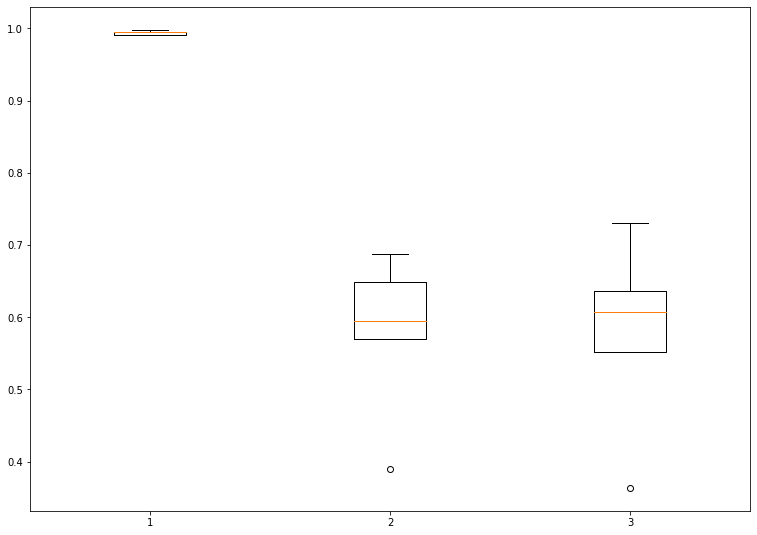

In [ ]:
#BoxPlot for cross validation scores

data_SVC = [cvs_SVC_lda, cvs_SVC_pca, cvs_SVC_normal]

fig_SVC = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_SVC = fig_SVC.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_SVC = ax_SVC.boxplot(data_SVC)
  
# show plot
plt.show()

##MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

def trainMLP(train_data, label_data, test_data,test_label):
  clf = MLPClassifier()
  clf=clf.fit(train_data,label_data)
  print(clf.score(test_data,test_label))
  cvs = cross_val_score(clf, train_data, label_data, cv=5)
  print(cvs)
  predicted_test = clf.predict(test_data)
  return predicted_test, cvs

##MLP_LDA

In [ ]:
predicted_test_MLP_lda, cvs_MLP_lda =trainMLP(lda_train_data,label_data,lda_test_data,test_label)
predicted_test_MLP_lda

0.4672131147540984
[0.99113475 0.99111901 0.9946714  0.9946714  0.9982238 ]


array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
pred_MLP_lda=predictDeepFakeResult(predicted_test_MLP_lda,frame_count_test_fake+frame_count_test_real)
print(pred_MLP_lda)

[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [ ]:

accuracy_score(actual_test_label, pred_MLP_lda)

0.48

In [ ]:

f1_score(actual_test_label, pred_MLP_lda)

0.5357142857142857

In [ ]:

log_loss(actual_test_label,pred_MLP_lda)

17.96041959653122

##MLP_PCA

In [ ]:
predicted_test_MLP_pca, cvs_MLP_pca =trainMLP(pca_train_data,label_data,pca_test_data,test_label)
predicted_test_MLP_pca

0.6161202185792349
[0.39539007 0.56305506 0.57904085 0.56660746 0.54706927]


array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
pred_MLP_pca=predictDeepFakeResult(predicted_test_MLP_pca,frame_count_test_fake+frame_count_test_real)
print(pred_MLP_pca)

[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [ ]:

accuracy_score(actual_test_label, pred_MLP_pca)

0.74

In [ ]:

f1_score(actual_test_label, pred_MLP_pca)

0.7719298245614036

In [ ]:

log_loss(actual_test_label,pred_MLP_pca)

8.980241782162816

##MLP_Normal

In [ ]:
predicted_test_MLP_normal, cvs_MLP_normal =trainMLP(train_data,label_data,test_data,test_label)
predicted_test_MLP_normal

0.5437158469945356
[0.40602837 0.52220249 0.43161634 0.52042629 0.52042629]


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
pred_MLP_normal=predictDeepFakeResult(predicted_test_MLP_normal,frame_count_test_fake+frame_count_test_real)
print(pred_MLP_normal)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:

accuracy_score(actual_test_label, pred_MLP_normal)

0.5

In [ ]:

f1_score(actual_test_label, pred_MLP_normal)

0.6666666666666666

In [ ]:

log_loss(actual_test_label,pred_MLP_normal)

17.26978799617044

##Comparison

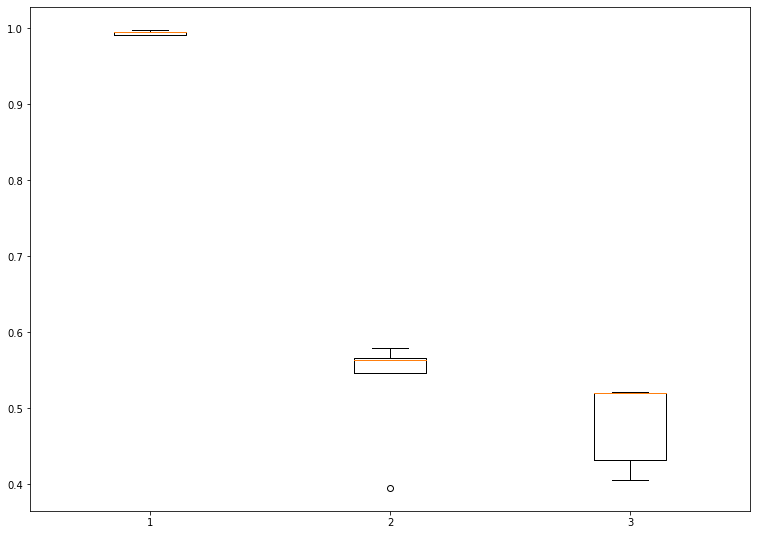

In [ ]:
#BoxPlot for cross validation scores

data_MLP = [cvs_MLP_lda, cvs_MLP_pca, cvs_MLP_normal]

fig_MLP = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_MLP = fig_MLP.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_MLP = ax_MLP.boxplot(data_MLP)
  
# show plot
plt.show()

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
def trainKNN(train_data, label_data, test_data,test_label):
  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(train_data,label_data)
  print(clf.score(test_data,test_label))
  cvs = cross_val_score(clf, train_data, label_data, cv=5)
  print(cvs)
  predicted_test = clf.predict(test_data)
  return predicted_test, cvs

##KNN_LDA

In [ ]:
predicted_test_KNN_lda, cvs_KNN_lda =trainKNN(lda_train_data,label_data,lda_test_data,test_label)
predicted_test_KNN_lda

0.46994535519125685
[0.9893617  0.99111901 0.9946714  0.9946714  0.9982238 ]


array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
pred_KNN_lda=predictDeepFakeResult(predicted_test_KNN_lda,frame_count_test_fake+frame_count_test_real)
print(pred_KNN_lda)

[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [ ]:

accuracy_score(actual_test_label, pred_KNN_lda)

0.5

In [ ]:

f1_score(actual_test_label, pred_KNN_lda)

0.5614035087719298

In [ ]:

log_loss(actual_test_label,pred_KNN_lda)

17.269644068633006

##KNN_PCA

In [ ]:
predicted_test_KNN_pca, cvs_KNN_pca =trainKNN(pca_train_data,label_data,pca_test_data,test_label)
predicted_test_KNN_pca

0.578551912568306
[0.36702128 0.51332149 0.58436945 0.54884547 0.76376554]


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
pred_KNN_pca=predictDeepFakeResult(predicted_test_KNN_pca,frame_count_test_fake+frame_count_test_real)
print(pred_KNN_pca)

[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]


In [ ]:

accuracy_score(actual_test_label, pred_KNN_pca)

0.62

In [ ]:

f1_score(actual_test_label, pred_KNN_pca)

0.6545454545454547

In [ ]:

log_loss(actual_test_label,pred_KNN_pca)

13.124926933449306

##KNN_Normal

In [ ]:
predicted_test_KNN_normal, cvs_KNN_normal =trainKNN(train_data,label_data,test_data,test_label)
predicted_test_KNN_normal

0.5525956284153005
[0.35460993 0.52753108 0.56483126 0.57726465 0.74067496]


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
pred_KNN_normal=predictDeepFakeResult(predicted_test_KNN_normal,frame_count_test_fake+frame_count_test_real)
print(pred_KNN_normal)

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]


In [ ]:

accuracy_score(actual_test_label, pred_KNN_normal)

0.56

In [ ]:

f1_score(actual_test_label, pred_KNN_normal)

0.5925925925925927

In [ ]:

log_loss(actual_test_label,pred_KNN_normal)

15.197269509092553

##Comparison

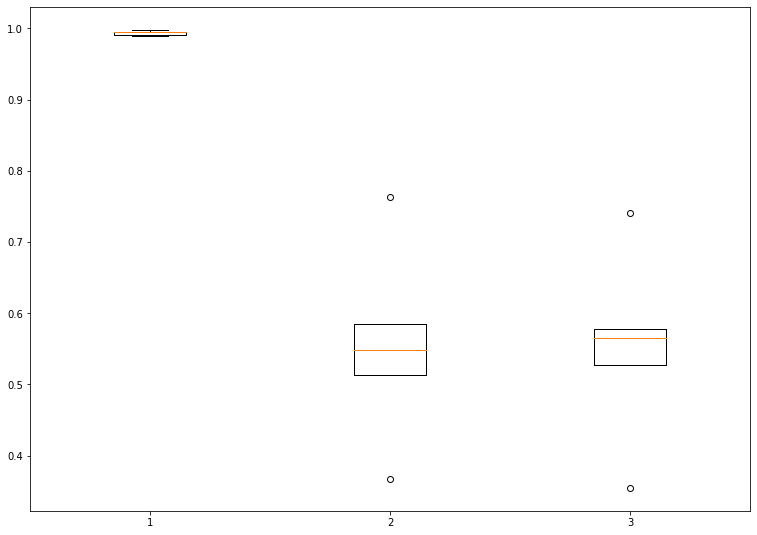

In [ ]:
#BoxPlot for cross validation scores

data_KNN = [cvs_KNN_lda, cvs_KNN_pca, cvs_KNN_normal]

fig_KNN = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_KNN = fig_KNN.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_KNN = ax_KNN.boxplot(data_KNN)
  
# show plot
plt.show()

##Comparison for LDAs

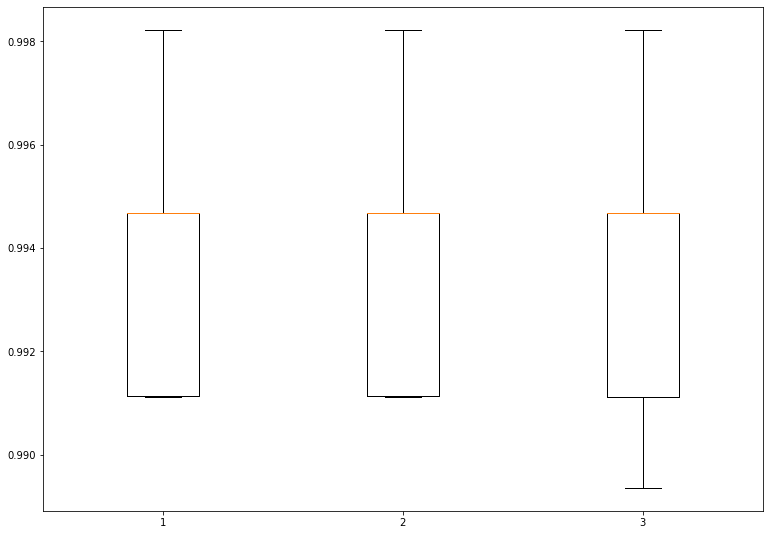

In [ ]:
#BoxPlot for cross validation scores

data_LDA = [cvs_SVC_lda, cvs_MLP_lda, cvs_KNN_lda]

fig_LDA = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_LDA = fig_LDA.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_LDA = ax_LDA.boxplot(data_LDA)
  
# show plot
plt.show()

##Comparison for PCAs

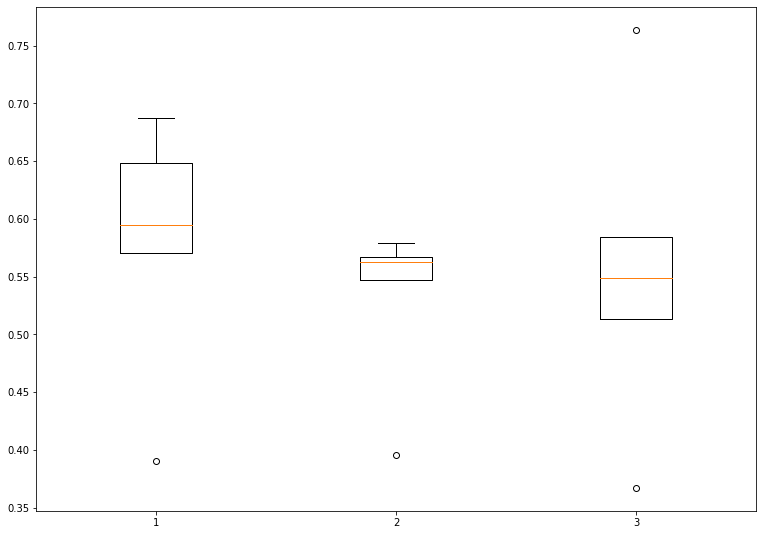

In [ ]:
#BoxPlot for cross validation scores

data_PCA = [cvs_SVC_pca, cvs_MLP_pca, cvs_KNN_pca]

fig_PCA = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_PCA = fig_PCA.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_PCA = ax_PCA.boxplot(data_PCA)
  
# show plot
plt.show()

##Comparison for Normals

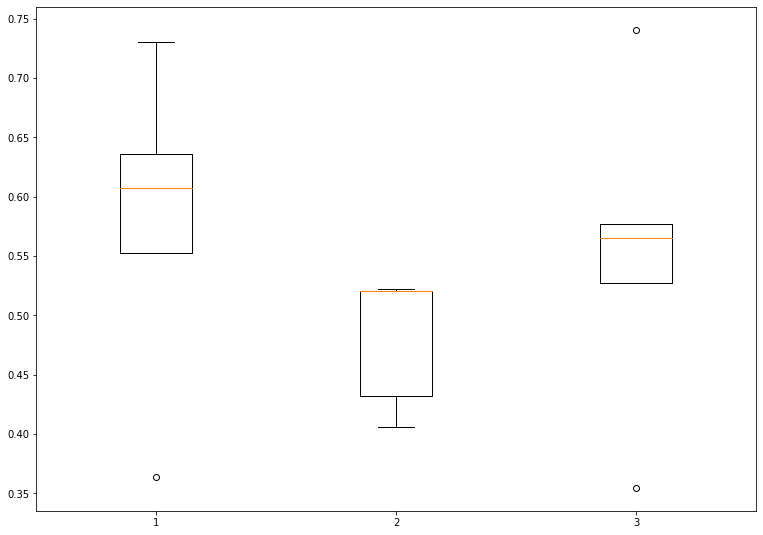

In [ ]:
#BoxPlot for cross validation scores

data_NORMAL = [cvs_SVC_normal, cvs_MLP_normal, cvs_KNN_normal]

fig_NORMAL = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_NORMAL = fig_NORMAL.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_NORMAL = ax_NORMAL.boxplot(data_NORMAL)
  
# show plot
plt.show()

##CNN

In [ ]:
def createImageArray(path_list):
  img_list = []
  for path in path_list:
    img = cv2.imread(path)
    img_list.append(img)
  return img_list

In [ ]:
# train_images_dlib_CNN = createImageArray(processedImagePath_Train_Fake_dlib + processedImagePath_Train_Real_dlib)
train_images_dlib_CNN = createImageArray(processedImagePath_Train_Real_dlib + processedImagePath_Train_Fake_dlib )

In [ ]:
train_images_dlib_label_CNN = [1]*len(processedImagePath_Train_Real_dlib) + [0]*len(processedImagePath_Train_Fake_dlib) 

In [ ]:
val_images_dlib_CNN = createImageArray(processedImagePath_Val_Fake_dlib + processedImagePath_Val_Real_dlib)

In [ ]:
val_images_dlib_label_CNN = [0]*len(processedImagePath_Val_Fake_dlib) + [1]*len(processedImagePath_Val_Real_dlib)

In [ ]:
test_images_dlib_CNN = createImageArray(processedImagePath_Test_Fake_dlib + processedImagePath_Test_Real_dlib)

In [ ]:
test_images_dlib_label_CNN = [0]*len(processedImagePath_Test_Fake_dlib) + [1]*len(processedImagePath_Test_Real_dlib)

In [ ]:
train_images_dlib_CNN_noise = createImageArray(processedImagePath_Train_Real_dlib_noise + processedImagePath_Train_Fake_dlib_noise )

In [ ]:
train_images_dlib_label_CNN_noise = [1]*len(processedImagePath_Train_Real_dlib_noise) + [0]*len(processedImagePath_Train_Fake_dlib_noise) 

In [ ]:
# processedImagePath_Train

In [ ]:
train_images_dlib_CNN = np.array(train_images_dlib_CNN)
train_images_dlib_label_CNN = np.array(train_images_dlib_label_CNN)
val_images_dlib_CNN = np.array(val_images_dlib_CNN)
val_images_dlib_label_CNN  = np.array(val_images_dlib_label_CNN )

In [ ]:
test_images_dlib_CNN = np.array(test_images_dlib_CNN)
test_images_dlib_label_CNN  = np.array(test_images_dlib_label_CNN )

In [ ]:
train_images_dlib_CNN_noise = np.array(train_images_dlib_CNN_noise)
train_images_dlib_label_CNN_noise = np.array(train_images_dlib_label_CNN_noise)

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf

In [ ]:
batch_size = 100
epochs = 20
num_classes = 2

In [ ]:
# cnn = Sequential()

# cnn.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(64,64,3),padding='same'))
# cnn.add(LeakyReLU(alpha=0.1))
# cnn.add(MaxPooling2D((2, 2),padding='same'))
# cnn.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
# cnn.add(LeakyReLU(alpha=0.1))
# cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# cnn.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
# cnn.add(LeakyReLU(alpha=0.1))                  
# cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# cnn.add(Flatten())
# cnn.add(Dense(128, activation='linear'))
# cnn.add(LeakyReLU(alpha=0.1))                  
# cnn.add(Dense(num_classes, activation='softmax'))


classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
classifier.add(MaxPooling2D((2, 2),padding='same'))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
classifier.add(Dropout(0.4))

# classifier.add(LeakyReLU(alpha=0.1))  
classifier.add(Flatten())
# classifier.add(Dense(2, activation='softmax'))
# classifier.add(Dense(units = 128, activation = 'relu'))
# classifier.add(Dense(units = 1, activation = 'sigmoid'))
# classifier.add(keras.layers.Dense(1, activation=tf.nn.softmax))
# classifier.add(keras.layers.Activation('sigmoid'))
classifier.add(Dropout(0.3))

classifier.add(keras.layers.Activation('sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# cnn.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
classifier.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
# cnn.summary()
classifier.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 128)     

In [ ]:
train_images_dlib_CNN = train_images_dlib_CNN.astype('float32')
val_images_dlib_CNN = val_images_dlib_CNN.astype('float32')
train_images_dlib_CNN  = train_images_dlib_CNN  / 255.
val_images_dlib_CNN = val_images_dlib_CNN / 255.

In [ ]:
test_images_dlib_CNN = test_images_dlib_CNN.astype('float32')
test_images_dlib_CNN  = test_images_dlib_CNN  / 255

In [ ]:
train_images_dlib_CNN_noise = train_images_dlib_CNN_noise.astype('float32')
train_images_dlib_CNN_noise  = train_images_dlib_CNN_noise / 255

In [ ]:
# train_cnn = cnn.fit(train_images_dlib_CNN, train_images_dlib_label_CNN, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(val_images_dlib_CNN, val_images_dlib_label_CNN))
train_cnn = classifier.fit(train_images_dlib_CNN, train_images_dlib_label_CNN, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(val_images_dlib_CNN, val_images_dlib_label_CNN),validation_steps = 2000)

In [ ]:
predicted_test_CNN= classifier.predict(test_images_dlib_CNN)

In [ ]:
pred_CNN_dlib = predictDeepFakeResult(predicted_test_CNN,frame_count_test_fake+frame_count_test_real)

In [ ]:
print(pred_CNN_dlib)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actual_test_label, pred_CNN_dlib)

0.5

In [ ]:
from sklearn.metrics import f1_score
f1_score(actual_test_label, pred_CNN_dlib)

0.0

In [ ]:
from sklearn.metrics import log_loss
log_loss(actual_test_label, pred_CNN_dlib)

17.269388197455342

##InceptionResnetV2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
def resizingImages(img_list):
  newImgList=[]
  for i in img_list:
    img = cv2.resize(i,(128, 128), interpolation=cv2.INTER_CUBIC)
    newImgList.append(img)
  return np.array(newImgList)

In [ ]:
train_Resizedimages_dlib_label = [0]*len(processedImagePath_Train_Fake_dlib) + [1]*len(processedImagePath_Train_Real_dlib)
train_Resizedimages_dlib_label = to_categorical(train_Resizedimages_dlib_label,2)
val_Resizedimages_dlib_label = [0]*len(processedImagePath_Val_Fake_dlib) + [1]*len(processedImagePath_Val_Real_dlib)
val_Resizedimages_dlib_label = to_categorical(val_Resizedimages_dlib_label,2)
test_Resizedimages_dlib_label = [0]*len(processedImagePath_Test_Fake_dlib) + [1]*len(processedImagePath_Test_Real_dlib)
test_Resizedimages_dlib_label = to_categorical(test_Resizedimages_dlib_label,2)
# train_images_dlib_label_CNN = [[1,0] for i in range(len(processedImagePath_Train_Fake_dlib))] + [[0,1] for i in range(len(processedImagePath_Train_Real_dlib))]
# val_images_dlib_label_CNN = [[1,0] for i in range(len(processedImagePath_Val_Fake_dlib))] + [[0,1] for i in range(len(processedImagePath_Val_Real_dlib))]
# print(train_images_dlib_label_CNN)

In [ ]:
train_Resizedimages_dlib_label_noise = [0]*len(processedImagePath_Train_Fake_dlib_noise) + [1]*len(processedImagePath_Train_Real_dlib_noise)

In [ ]:
print(train_Resizedimages_dlib_label)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
train_Resizedimages_dlib = resizingImages(train_images_dlib_CNN)
# train_Resizedimages_dlib_label = np.array(train_images_dlib_label_CNN)
val_Resizedimages_dlib = resizingImages(val_images_dlib_CNN)
# val_Resizedimages_dlib_label = np.array(val_images_dlib_label_CNN )

In [ ]:
# test_images_dlib_label_CNN = [[1,0] for i in range(len(processedImagePath_Test_Fake_dlib))] + [[0,1] for i in range(len(processedImagePath_Test_Real_dlib))]
test_Resizedimages_dlib = resizingImages(test_images_dlib_CNN)
# test_Resizedimages_dlib_label  = np.array(test_images_dlib_label_CNN )

In [ ]:
train_Resizedimages_dlib_noise = resizingImages(train_images_dlib_CNN_noise)

In [ ]:
train_Resizedimages_dlib = train_Resizedimages_dlib.astype('float32')
val_Resizedimages_dlib = val_Resizedimages_dlib.astype('float32')
train_Resizedimages_dlib  = train_Resizedimages_dlib  / 255.
val_Resizedimages_dlib = val_Resizedimages_dlib / 255.

In [ ]:
test_Resizedimages_dlib = test_Resizedimages_dlib.astype('float32')
test_Resizedimages_dlib = test_Resizedimages_dlib / 255

In [ ]:
train_Resizedimages_dlib_noise = train_Resizedimages_dlib_noise.astype('float32')
train_Resizedimages_dlib_noise  = train_Resizedimages_dlib_noise / 255.

In [ ]:
x = []
# train_Resizedimages_dlib_label_noise_list = []
train_Resizedimages_dlib_label_list = []

# for i in range(len(train_Resizedimages_dlib_label_noise)):
#   train_Resizedimages_dlib_label_noise_list.append(list(train_Resizedimages_dlib_label_noise[i]))

for i in range(len(train_Resizedimages_dlib_label)):
  train_Resizedimages_dlib_label_list.append(list(train_Resizedimages_dlib_label[i]))
x = train_Resizedimages_dlib_label_list

s = train_Resizedimages_dlib_label_noise

for i in range(len(s)):
  if(s[i]==1):
    x.append([0,1])
  else:
    x.append([1,0])


In [ ]:
googleNet_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(128,128,3))
googleNet_model.trainable = True
model = Sequential()
model.add(googleNet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 2, 2, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1536)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 3074      
Total params: 54,339,810
Trainable params: 54,279,266
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
len(train_data)

2816

In [ ]:
len(x)

5632

In [ ]:
train_data[0]

In [ ]:
type(train_Resizedimages_dlib)

numpy.ndarray

In [378]:
EPOCHS = 5
BATCH_SIZE = 16

# history = model.fit(train_Resizedimages_dlib, train_Resizedimages_dlib_label, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (val_Resizedimages_dlib, val_Resizedimages_dlib_label), verbose = 1)
history = model.fit(np.array(train_list), np.array(x), batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (val_Resizedimages_dlib, val_Resizedimages_dlib_label), verbose = 1)

Epoch 1/5
352/352 [==============================] - 72s 147ms/step - loss: 0.7350 - accuracy: 0.4997 - val_loss: 0.9866 - val_accuracy: 0.3896
Epoch 2/5
352/352 [==============================] - 48s 137ms/step - loss: 0.6173 - accuracy: 0.6239 - val_loss: 1.4075 - val_accuracy: 0.3238
Epoch 3/5
352/352 [==============================] - 48s 138ms/step - loss: 0.5677 - accuracy: 0.6556 - val_loss: 1.8490 - val_accuracy: 0.2775
Epoch 4/5
352/352 [==============================] - 48s 136ms/step - loss: 0.5115 - accuracy: 0.6812 - val_loss: 2.0687 - val_accuracy: 0.3048
Epoch 5/5
352/352 [==============================] - 48s 136ms/step - loss: 0.4754 - accuracy: 0.7214 - val_loss: 2.6059 - val_accuracy: 0.2698


In [ ]:
predicted_test_Inception= model.predict_classes(test_Resizedimages_dlib)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#predicted_test_Inception.sort()
print(predicted_test_Inception)

[1 1 1 ... 1 1 1]


In [ ]:
pred_Inception_dlib = predictDeepFakeResult(predicted_test_Inception,frame_count_test_fake+frame_count_test_real)
print(pred_Inception_dlib)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actual_test_label, pred_Inception_dlib)

0.5

In [ ]:
from sklearn.metrics import f1_score
f1_score(actual_test_label, pred_Inception_dlib)

0.6666666666666666

In [ ]:
from sklearn.metrics import log_loss
log_loss(actual_test_label, pred_Inception_dlib)

17.26978799617044

In [ ]:
train_data_mediapipe,label_data_mediapipe = createFeatureDatabase(processedImagePath_Train_Real_mediapipe,processedImagePath_Train_Fake_mediapipe)

In [ ]:
len(train_data_mediapipe)

2760

In [ ]:
test_data_mediapipe, test_label_mediapipe = createFeatureDatabase(processedImagePath_Test_Real_mediapipe,processedImagePath_Test_Fake_mediapipe)

##Efficient Net

In [ ]:
!pip install efficientnet

     |████████████████████████████████| 51kB 3.9MB/s 


In [ ]:
from efficientnet.tfkeras import EfficientNetB4
from keras.regularizers import l2
efficient_net = EfficientNetB4(
    weights = 'imagenet',
    input_shape = (128, 128, 3),
    include_top = False,
    pooling = 'max'
)

model = Sequential()
model.add(efficient_net)
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b4 (Functional) (None, 1792)              17673816  
_________________________________________________________________
dense_22 (Dense)             (None, 512)               918016    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 18,657,625
Trainable params: 18,532,425
Non-trainable params: 125,200
_________________________________________________________________


In [ ]:
batch_size = 20
epochs = 3
num_classes = 2

In [ ]:
# cnn.summary()
# classifier.summary()
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x = []
# train_Resizedimages_dlib_label_noise_list = []
train_Resizedimages_dlib_label_list = []

# for i in range(len(train_Resizedimages_dlib_label_noise)):
#   train_Resizedimages_dlib_label_noise_list.append(list(train_Resizedimages_dlib_label_noise[i]))

for i in range(len(train_Resizedimages_dlib_label)):
  train_Resizedimages_dlib_label_list.append(list(train_Resizedimages_dlib_label[i]))
x = train_Resizedimages_dlib_label_noise 

s = train_Resizedimages_dlib_label_list

for i in range(len(s)):
  if(s[i][0]==1):
    x.append(0)
  else:
    x.append(1)


0

In [ ]:
train_list = []
train_Resizedimages_dlib_noise_list = []
train_Resizedimages_dlib_list = []

for i in range(len(train_Resizedimages_dlib_noise)):
  train_Resizedimages_dlib_noise_list.append(list(train_Resizedimages_dlib_noise[i]))

for i in range(len(train_Resizedimages_dlib)):
  train_Resizedimages_dlib_list.append(list(train_Resizedimages_dlib[i]))

# x = train_Resizedimages_dlib_label_noise 
train_list = train_Resizedimages_dlib_noise_list + train_Resizedimages_dlib_list 


In [ ]:
y = []
for i in range(len(val_Resizedimages_dlib_label)):
  if(val_Resizedimages_dlib_label[i][0]==1):
    y.append(0)
  else:
    y.append(1)

In [ ]:
len(x)

5632

In [ ]:
len(train_list)

5632

In [ ]:
# train_cnn = cnn.fit(train_images_dlib_CNN, train_images_dlib_label_CNN, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(val_images_dlib_CNN, val_images_dlib_label_CNN))
train_cnn = model.fit(np.array(train_list) , np.array(x),epochs=epochs,verbose=1,validation_data=(val_Resizedimages_dlib, np.array(y)),validation_steps = 80 )

Epoch 1/3
176/176 [==============================] - 52s 199ms/step - loss: 0.9033 - accuracy: 0.5474 - val_loss: 0.9300 - val_accuracy: 0.3672
Epoch 2/3
176/176 [==============================] - 32s 184ms/step - loss: 0.6407 - accuracy: 0.6571 - val_loss: 1.7126 - val_accuracy: 0.2803
Epoch 3/3
176/176 [==============================] - 32s 183ms/step - loss: 0.4846 - accuracy: 0.7629 - val_loss: 2.7963 - val_accuracy: 0.2859


In [ ]:
len(x)

5632

In [ ]:
predicted_test_CNN= model.predict(test_Resizedimages_dlib)

In [ ]:
pred_CNN_dlib = predictDeepFakeResult(predicted_test_CNN,frame_count_test_fake+frame_count_test_real)

22 7
29 1
29 0
21 8
11 19
28 2
6 24
26 3
26 3
1 28
5 24
8 22
25 5
9 20
25 0
23 0
24 0
23 0
24 0
22 0
22 0
24 0
23 0
24 0
22 0
20 10
3 26
16 14
7 24
7 22
6 23
1 28
4 26
0 29
0 29
9 21
5 24
20 8
14 15
10 19
9 20
11 18
9 20
9 21
9 21
26 4
10 19
22 7
7 23
0 30


In [ ]:
print(pred_CNN_dlib)
print(actual_test_label)
print(predicted_test_CNN)

[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[0.1517316 ]
 [0.8373086 ]
 [0.8915899 ]
 ...
 [0.00318196]
 [0.33768559]
 [0.94017416]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actual_test_label, pred_CNN_dlib)

0.22

In [ ]:
from sklearn.metrics import f1_score
f1_score(actual_test_label, pred_CNN_dlib)

0.20408163265306126

In [ ]:
from sklearn.metrics import log_loss
log_loss(actual_test_label, pred_CNN_dlib)

26.940549435053804